<a href="https://colab.research.google.com/github/slbryson/MLlearn/blob/master/Whisper_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import torch


# Check if CUDA is available
if torch.cuda.is_available():
    # Use the first available GPU device
    device = torch.device("cuda:0")
    # Print the current device
    print(f"Using device: {torch.cuda.get_device_name(device)}")
else:
    print("CUDA is not available, using CPU instead.")
    device = torch.device("cpu")



Using device: Tesla T4


In [2]:
#Grab the whisper library
!pip install -U openai-whisper
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-r9uk62h5
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-r9uk62h5
  Resolved https://github.com/openai/whisper.git to commit 7858aa9c08d98f75575035ecd6481f462d66ca27
  Preparing metadata (setup.py) ... done


In [3]:

import whisper
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

# Load the large model
model = whisper.load_model('large')

# Move the model to the current device
model.to(device)

#Set Audio length
audio_len = 5
# Generate a random audio signal of length 1 second and sampling rate 44100 Hz
audio_signal = np.random.randn(44100*audio_len).astype(np.float32)

# Write the audio signal to a WAV file
write('random_audio.wav', 44100, audio_signal)

# Load the audio file using whisper
input_tensor = whisper.load_audio('random_audio.wav')

# Reshape the input tensor to have shape (1, num_samples, num_channels)
input_tensor = input_tensor.reshape((1, -1, 1))

# Move the input tensor to the current device
input_tensor = torch.from_numpy(input_tensor).to(device)





In [4]:
input_tensor = whisper.load_audio('random_audio.wav')
input_tensor = whisper.pad_or_trim(input_tensor)

In [5]:
# Run the model once to initialize the GPU
# _ = model.transcribe(input_tensor)

result = model.transcribe(input_tensor)
print(result["text"])

 If you like my video, please subscribe to my channel.


In [16]:
# Benchmark the GPU by running the model multiple times
num_iterations = 10
times = []
for i in range(num_iterations):
    start_time = time.time()
    _ = model.transcribe(input_tensor)
    end_time = time.time()
    times.append(end_time - start_time)

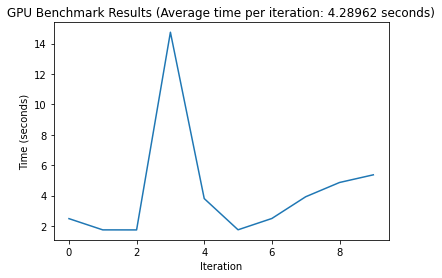

In [17]:
# Calculate the average time per iteration
avg_time_per_iteration = sum(times) / num_iterations

# Plot the results
plt.plot(times)
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title(f"GPU Benchmark Results (Average time per iteration: {avg_time_per_iteration:.5f} seconds)")
plt.show()